<a href="https://colab.research.google.com/github/tseykoroman/ML_for_business/blob/main/Tseyko_less_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
2. Сделать обзорный анализ выбранного датасета
3. Обучить любой классификатор (какой вам нравится)
4.  разобраться с SHAP и построить важности признаков для:
    - всего тестового набора данных (summary_plot - дать интерпретацию)
    - для 5 случайных объектов из тестового набора

https://archive-beta.ics.uci.edu/ml/datasets/adult

In [262]:
# !wget --no-check-certificate 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' -O  items.csv

In [263]:
import pandas as pd
import numpy as np
colnames=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
          'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
df = pd.read_csv("C:/items.csv", names=colnames, header=None)
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


What do the instances that comprise the dataset represent?

Listing of attributes: >50K, <=50K. 



*   age: continuous. 
*   workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
*  fnlwgt: continuous. 
*  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
*  education-num: continuous.  
*  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
*  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
*  relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
*  race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
*  sex: Female, Male. capital-gain: continuous.  
*  capital-loss: continuous. hours-per-week: continuous. 
*  native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

 















In [264]:
import matplotlib
import matplotlib.pyplot as plt

In [265]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [266]:
df['education'].value_counts().count()

16

In [267]:
df['education-num'].value_counts().count()

16

In [268]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [269]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()

{0: ' ?', 1: ' Adm-clerical', 2: ' Armed-Forces', 3: ' Craft-repair', 4: ' Exec-managerial', 5: ' Farming-fishing', 6: ' Handlers-cleaners', 7: ' Machine-op-inspct', 8: ' Other-service', 9: ' Priv-house-serv', 10: ' Prof-specialty', 11: ' Protective-serv', 12: ' Sales', 13: ' Tech-support', 14: ' Transport-moving'}


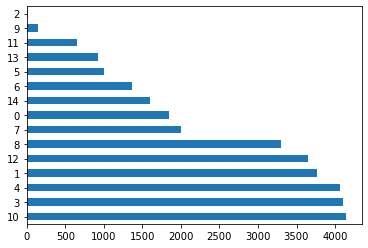

In [270]:
mapped_occupation = pd.Series(label_encoder.fit_transform(df['occupation']))
mapped_occupation.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

{0: ' Husband', 1: ' Not-in-family', 2: ' Other-relative', 3: ' Own-child', 4: ' Unmarried', 5: ' Wife'}


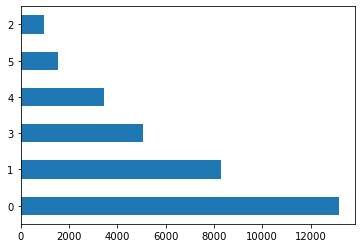

In [271]:
mapped_relationship = pd.Series(label_encoder.fit_transform(df['relationship']))
mapped_relationship.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

{0: ' Divorced', 1: ' Married-AF-spouse', 2: ' Married-civ-spouse', 3: ' Married-spouse-absent', 4: ' Never-married', 5: ' Separated', 6: ' Widowed'}


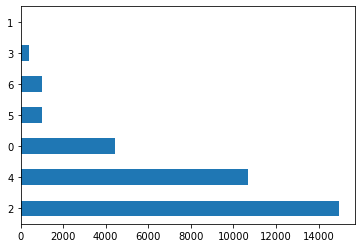

In [272]:
mapped_marital_status = pd.Series(label_encoder.fit_transform(df['marital-status']))
mapped_marital_status.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

{0: ' Husband', 1: ' Not-in-family', 2: ' Other-relative', 3: ' Own-child', 4: ' Unmarried', 5: ' Wife'}


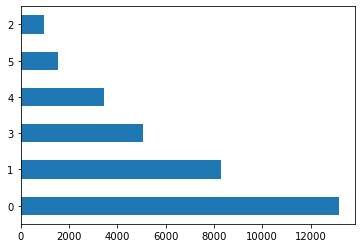

In [273]:
mapped_relationship = pd.Series(label_encoder.fit_transform(df['relationship']))
mapped_relationship.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

{0: ' ?', 1: ' Federal-gov', 2: ' Local-gov', 3: ' Never-worked', 4: ' Private', 5: ' Self-emp-inc', 6: ' Self-emp-not-inc', 7: ' State-gov', 8: ' Without-pay'}


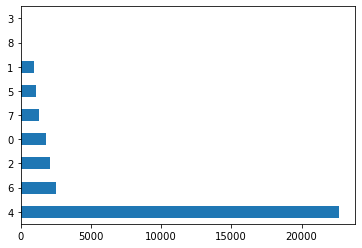

In [274]:
mapped_workclass = pd.Series(label_encoder.fit_transform(df['workclass']))
mapped_workclass.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

{0: ' 10th', 1: ' 11th', 2: ' 12th', 3: ' 1st-4th', 4: ' 5th-6th', 5: ' 7th-8th', 6: ' 9th', 7: ' Assoc-acdm', 8: ' Assoc-voc', 9: ' Bachelors', 10: ' Doctorate', 11: ' HS-grad', 12: ' Masters', 13: ' Preschool', 14: ' Prof-school', 15: ' Some-college'}


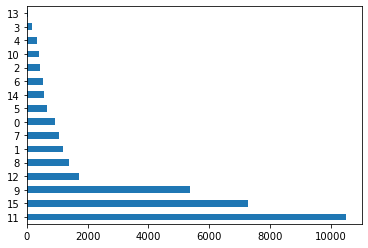

In [275]:
mapped_education = pd.Series(label_encoder.fit_transform(df['education']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

{0: ' Amer-Indian-Eskimo', 1: ' Asian-Pac-Islander', 2: ' Black', 3: ' Other', 4: ' White'}


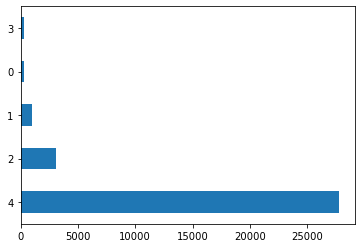

In [276]:
mapped_race = pd.Series(label_encoder.fit_transform(df['race']))
mapped_race.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

{0: ' Female', 1: ' Male'}


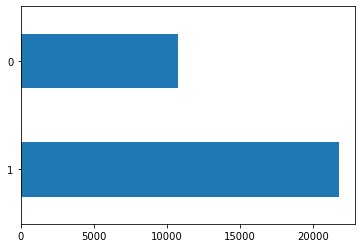

In [277]:
mapped_sex = pd.Series(label_encoder.fit_transform(df['sex']))
mapped_sex.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [278]:
df = df.drop(columns='education')

In [279]:
df_col = df.drop(columns='class')

In [280]:
categorical_columns = df_col.columns[df_col.dtypes == 'object'].union(['occupation'])
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,<=50K


In [281]:
df.dtypes

age                int64
workclass          int32
fnlwgt             int64
education-num      int64
marital-status     int32
occupation         int32
relationship       int32
race               int32
sex                int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int32
class             object
dtype: object

In [282]:
df.describe()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866
std,13.640433,1.455960,1.055500e+05,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,1.783560e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


In [283]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [284]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])

In [285]:
df_num_features.columns.tolist()

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [286]:
df['class'].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

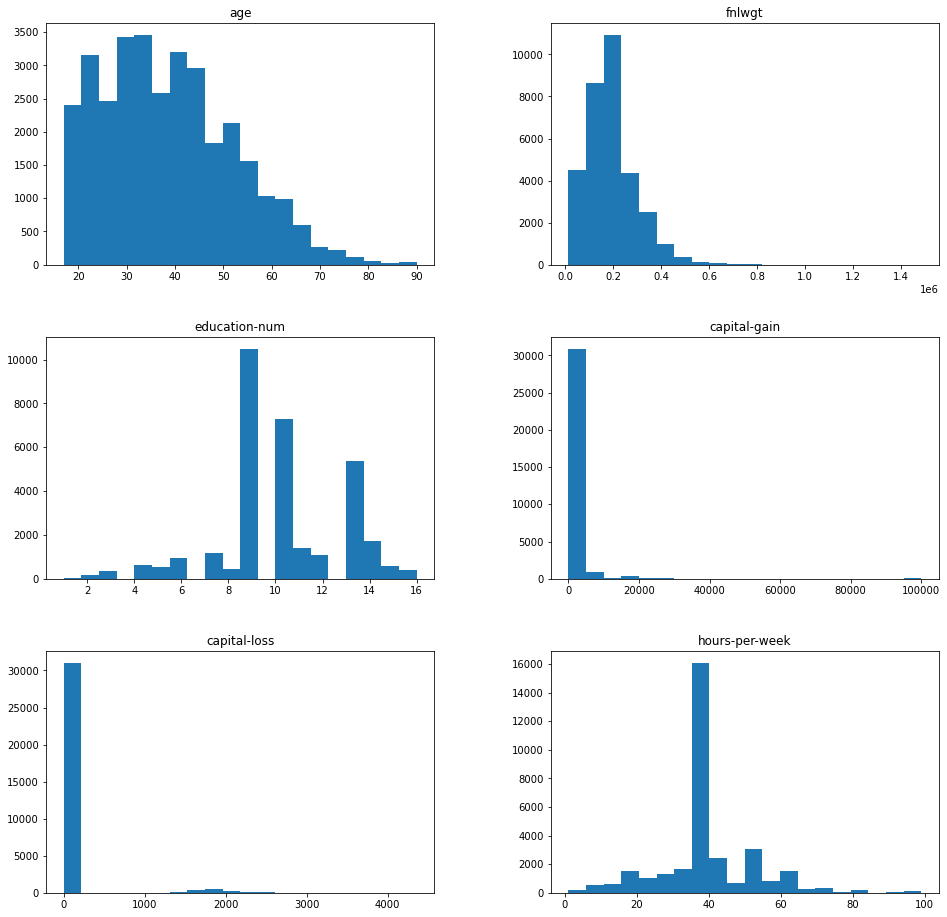

In [287]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

In [288]:
class DataPreprocessing:

    def __init__(self):
        self.medians = None
        self.fnlwgt_quantile = None
        self.capital_gain_quantile = None
        self.capital_loss_quantile = None
        
        
    def fit(self, X):     
        self.medians = X.median()
        self.fnlwgt_quantile = X['fnlwgt'].quantile(.975)
        self.capital_gain_quantile = X['capital-gain'].quantile(.975)
        self.capital_lossn_quantile = X['capital-loss'].quantile(.975)
        
    def transform(self, X):
        # Usage_kWh
        X['fnlwgt_outlier'] = 0
        X.loc[(X['fnlwgt'] > self.fnlwgt_quantile), 'fnlwgt_outlier'] = 1
        X.loc[X['fnlwgt'] > self.fnlwgt_quantile, 'fnlwgt'] = self.medians['fnlwgt']
        
        # CO2(tCO2)
        X['capital-gain_outlier'] = 0
        X.loc[(X['capital-gain'] > self.capital_gain_quantile), 'capital-gain_outlier'] = 1
        X.loc[X['capital-gain'] > self.capital_gain_quantile, 'capital-gain'] = self.medians['capital-gain']
        
        # CO2(tCO2)
        X['capital-loss_outlier'] = 0
        X.loc[(X['capital-loss'] > self.capital_loss_quantile), 'capital-loss_outlier'] = 1
        X.loc[X['capital-loss'] > self.capital_loss_quantile, 'capital-loss'] = self.medians['capital-loss']
        
        return X

In [289]:
df['class']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: class, Length: 32561, dtype: object

{0: ' <=50K', 1: ' >50K'}


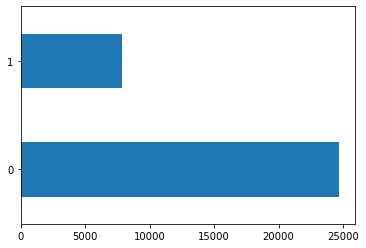

In [290]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(df['class']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))

In [291]:
df['class'] = label_encoder.fit_transform(df['class'])

In [292]:
df['class']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: class, Length: 32561, dtype: int32

In [293]:
preprocessor = DataPreprocessing()
preprocessor.fit(df)

In [294]:
df = preprocessor.transform(df)

In [295]:
df.dtypes

age                       int64
workclass                 int32
fnlwgt                  float64
education-num             int64
marital-status            int32
occupation                int32
relationship              int32
race                      int32
sex                       int32
capital-gain            float64
capital-loss            float64
hours-per-week            int64
native-country            int32
class                     int32
fnlwgt_outlier            int64
capital-gain_outlier      int64
capital-loss_outlier      int64
dtype: object

In [296]:
from sklearn.model_selection import train_test_split, cross_val_score

In [297]:
!pip install shap --user package-name

In [298]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

In [299]:
features = ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'hours-per-week']

X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1)[features], 
                                                    df['class'])

LGBM

Отрисовка идет по двум классам

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


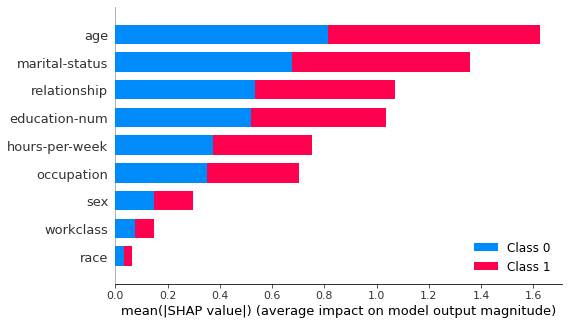

In [300]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=1)
lgb_model.fit(X_train, y_train)

y_preds = lgb_model.predict(X_test)

# строим модель объяснения в SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)

# покажем объяснение
shap.initjs() # для работы в колабе
shap.summary_plot(shap_values, X_test)

Будем анализировать только первый класс - целевой.

Explained expected value: [[ 0.88021529  0.06087108  0.81796027 ...  0.01722925  0.1256171
   0.3777423 ]
 [ 0.69946914  0.01776892  0.96231403 ...  0.01270467  0.14963743
   0.78807425]
 [ 0.51625699 -0.37746295 -0.18637017 ... -0.77355139  0.08451169
   0.00474126]
 ...
 [ 0.53506932  0.03845485  0.79986052 ...  0.03743491 -0.27440677
  -0.16446356]
 [ 0.80273294 -0.00912551 -0.39348882 ...  0.03599211 -0.36265231
   0.46859866]
 [ 0.33738942 -0.01503303 -0.38554432 ...  0.01181191 -0.19150023
  -0.27236672]]


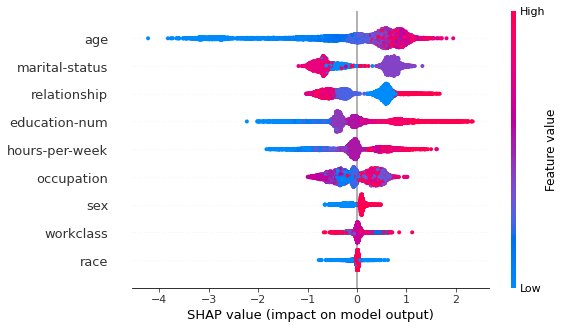

In [301]:
if isinstance(shap_values, list):
    shap_values = shap_values[1]

print(f'Explained expected value: {shap_values}')

shap.summary_plot(shap_values, X_test)

С каждым объектом и признаком связывается величина выигрыша или проигрыша. Она показывает, что данное значение поднимало ответ нашей модели или опускало:
- положительные значения - увеличивался ответ (справа от вертикальной линии, целевой класс)
- отрицательные значения - уменьшался ответ (слева от вертикальной линии, нецелевой класс)

А результирующий график - это 
- толщина полосы - как много таких значений
- длина полосы - какой вклад вносится в ответ
- high/low - значения в самом признаке


**Пара интерпретаций:**
1. Чем меньше возраст человека, тем меньше он зарабатывает. 
2. Вдовцы, разведенные люди зарабатывают меньше, чем люди в браке/отношениях. 
3. Женщины зарабатывают меньше мужчин. 
4. Чем больше человек работает - тем больше у него заработок (что логично).
5. Про образование и сферу деятельности сложно скаазать, но поверхностно можно сдлать вывод, что технические специальности менее оплачиваемы, чем гуманитарные.

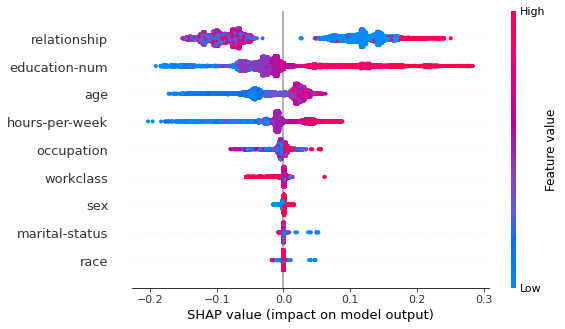

In [302]:
model = xgboost.train({"learning_rate": 0.01, 'random_state': 1}, 
                      xgboost.DMatrix(X_train, label=y_train), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values_all = explainer.shap_values(X_train)

shap.summary_plot(shap_values_all, X_train)

Здесь видим, уже другие значения по сравнению с LigthGBM.


**Пара интерпретаций:**
1. наиболее весомыми признаками являются статус отношений и образование. 
2. закономерность большего заработка у людей в браке/отношениях сохраняется. 
3. Закономерности о возрасте, образовании, количестве отработанных в неделю часов также аналогичны.

In [303]:
# visualize the first prediction's explanation
shap.initjs()
idx = 2
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], X_train.iloc[idx,:])

У человека небольшая вероятность получать >50К (0.19) 
Молодой возраст, отсутствие брака и низкое образование тянут его вероятность вниз

In [304]:
# visualize the first prediction's explanation
shap.initjs()
idx = 5
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], X_train.iloc[idx,:])

У человека большая вероятность получать >50К (0.7) 

Зрелый возраст, большое количество часов работы в неделю, наличие брака, высокое образование тянут его вероятность вверх

In [305]:
# visualize the first prediction's explanation
shap.initjs()
idx = 10
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], X_train.iloc[idx,:])

У человека средняя вероятность получать >50К (0.36) 

Наличие брака тянет его вероятность вверх, но средний возраст, стандартное количество часов работы в неделю и не самое высокое образование тянут вероятность вниз

In [306]:
# visualize the first prediction's explanation
shap.initjs()
idx = 10
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], X_train.iloc[idx,:])

У человека достаточно большая вероятность получать >50К (0.5) 
Зрелый возраст, наличие брака тянут ее вероятность вверх, но малое количество часов работы в неделю тянет ее вероятность вниз

In [307]:
# visualize the first prediction's explanation
shap.initjs()
idx = 150
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], X_train.iloc[idx,:])

У человека достаточно малая вероятность получать >50К (0.21) 

Образование тянет его вероятность вверх, но средний возраст, стандартное количество часов работы в неделю, отсутствие семейных отношений тянут вероятность вниз

In [308]:
# visualize the first prediction's explanation
shap.initjs()
idx = 200
shap.force_plot(explainer.expected_value, shap_values_all[idx,:], X_train.iloc[idx,:])

У человека достаточно большая вероятность получать >50К (0.52) 

Зрелый возраст, наличие супруги тянут его вероятность вверх, но стандартное количество часов немного тянет вероятность вниз

Можем отрисовать верхние диаграммы немного иначе, через waterfall.

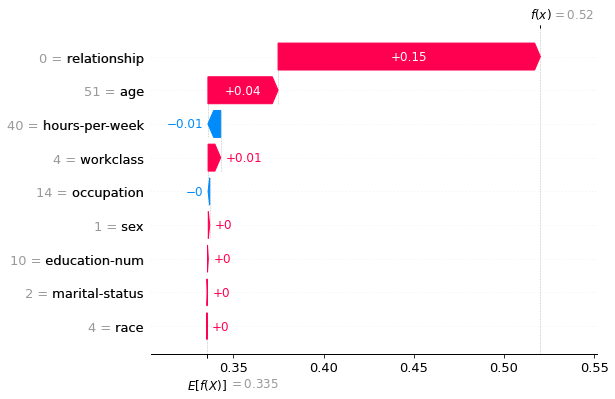

In [309]:
shap_values_one = explainer(X_train.iloc[idx:idx+1])
shap.plots.waterfall(shap_values_one[0])

Можно даже просто взять средние значения SHAP для каждого признака

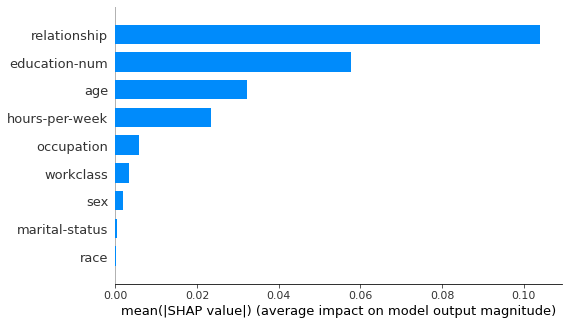

In [310]:
shap.summary_plot(shap_values_all, X_train, plot_type="bar")

Есть визуализация через тепловые карты. Это для визуализации по всем данным (практически, как было в summary_plot, только будем еще знать, по каким объектам).

Такие диаграммы еще могут и определить признаки, которые решают задачу.

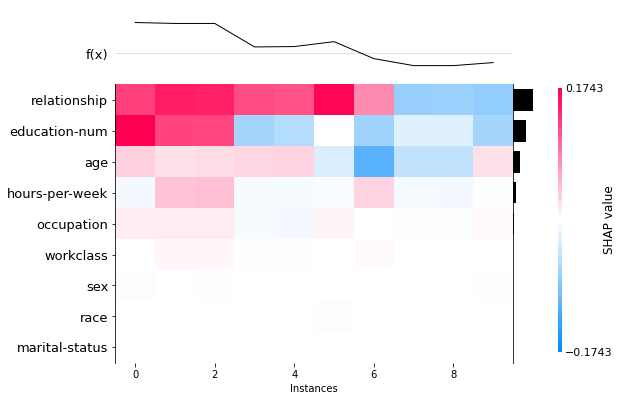

In [311]:
n = 10
shap_values = explainer(X_train.iloc[:n])
shap.plots.heatmap(shap_values)

Следующая диаграмма позволяет в интерактивном режиме посмотреть на все решения, которые были сделаны. Можно смотреть в нескольких разрезах.

In [312]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_all[:n], X_train.iloc[:n])

В целом можно сказать, что наиболее существенные признаки это отношения, образование, кол-во часов работы и возраст.

